In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

## Notice 

An [average song length](url=https://www.statcrunch.com/5.0/viewreport.php?groupid=948&reportid=28647) is 226 seconds.  
  
The [average bpm](url=https://learningmusic.ableton.com/make-beats/tempo-and-genre.html) for a song is 120. 

The [semiquaver length](url=http://bradthemad.org/guitar/tempo_explanation.php) is 15 / bpm.  
  
15 / 120 = 0.125 seconds per semiquaver  
0.125 * 16 notes per vector = 2 seconds per bar   
226 / 2 = 113 bars per song. 

Therefore, any song above (113 * 16) 1808 is a song thats above average song length.  
During anaylisis of the dataset, some songs were discovered that were over 80k bars long. These will create noise in the data.  
But, the songs does not all have to be exactly on average. As not to narrow the dataset down too much, any song below 2 * 1808 is accepted.  
Short songs is not a problem for sequence learning. But, a song less than two bars is considered too short.  
Therefore, songs below size 32 is discarded.

In [2]:
max_song_len = int(2 * 16 * 113)
min_song_len = int(2 * 16)

counter = 0
midi_files = []

for root, dirs, files in os.walk("parsed_midi_files"):
    for file in files:
        if file.endswith(".npy"):
            melody = np.load("parsed_midi_files/" + file)
            
            if (len(melody) < max_song_len) and \
            (len(melody) > min_song_len):
                midi_files.append(melody)
            
            else: counter += 1

print("{} files didn't make the cut, but {} files did".format(counter,len(midi_files)))

192 files didn't make the cut, but 9786 files did


#### This must be done manually

In [3]:
np.savez("pop_midi_dataset.npz", 
         train_0=midi_files[0:1000], 
         train_1=midi_files[1000:2000], 
         train_2=midi_files[2000:3000],
         train_3=midi_files[3000:4000],
         train_4=midi_files[4000:5000],
         train_5=midi_files[5000:6000],
         train_6=midi_files[6000:7000],
         train_7=midi_files[7000:8000],
         train_8=midi_files[8000:len(midi_files)])

## Evaluating data

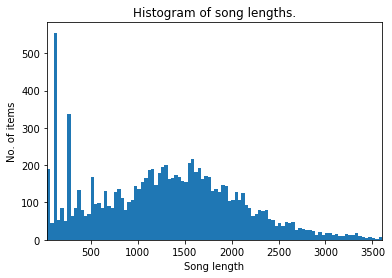

In [11]:
song_lengths = [len(x) for x in midi_files]

plt.hist(song_lengths,bins=100) 
plt.title("Histogram of song lengths.")
plt.ylabel("No. of items")
plt.xlabel("Song length")
plt.xlim(min(song_lengths),max(song_lengths))
plt.show()